<a href="https://colab.research.google.com/github/KwameOtooAppiah/Neuro265/blob/main/coding_homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding Homework #3

**Instructions**

1. Make a *Markdown Cell* that contains the following information:
- Your name (small header)
- The name of this class (italicized)
- The date (bolded)

2. Make a *Code Cell* that imports <code>numpy</code> as <code>np</code>, <code>matplotlib.pyplot</code> as <code>plt</code>, and <code>scipy.stats</code> as <code>stats</code>.

3. Make a *Code Cell* that imports your <code>v_rest_sst.csv</code> and <code>v_rest_pvalb.csv</code> variables as <code>numpy</code> arrays called <code>v_rest_sst</code> and <code>v_rest_pvalb</code> respectively.

4. Make a *Code Cell* that does the following:
  
  a. Finds the means of <code>v_rest_sst</code> and <code>v_rest_pvalb</code>.
  
  b. Performs a t-test to test the null hypothesis that the means of <code>v_rest_sst</code> and <code>v_rest_pvalb</code> come from different distributions.

  c. Plots a histogram of <code>v_rest_sst</code> in one subplot, and a histogram of <code>v_rest_pvalb</code> in another subplot if the p-value of the t-test is > 0.05. You can make two subplots using the syntax <code>fig, ax = plt.subplots(1,1)</code>. You should use an <code>if</code> statement to accomplish this.

  d. Labels the y-axis and x-axis of your histograms (recall that <code>ax.ylabel</code> and <code>ax.xlabel</code> are the methods that let you accomplish this).

5. Make a *Code Cell* that defines a function called <code>vrestHist()</code>. This function should execute the code in step 4 when called.

6. Make a *Code Cell* that calls <code>vrestHist()</code>.

7. Make a *Code Cell* that does the following:

    a. Loops through each column of <code>v_rest_sst</code> and <code>v_rest_pvalb</code> and makes a scatter plot with <code>v_rest_sst</code> on the x-axis and <code>v_rest_pvalb</code> on the y-axis.

    b. Each iteration of your loop should plot a different point on the scatter plot. At the end of your loop, you should have only one scatter plot with number of data points equal to the length of <code>v_rest_sst</code> and <code>v_rest_pvalb</code>.

    c. Your loop should plot a <font color = 'red'>red</font> dot if *both* values in <code>v_rest_sst</code> and <code>v_rest_pvalb</code> are greater than -60, a <font color = 'green'>green</font> dot if values in <code>v_rest_sst</code> are greater than -60, but values in <code>v_rest_pvalb</code> are less than -60, a <font color = 'blue'>blue</font> dot if *both* values in <code>v_rest_sst</code> and <code>v_rest_pvalb</code> are less than -60, and a <font color = 'purple'>purple</font> dot if values in <code>v_rest_sst</code> are less than -60, but values in <code>v_rest_pvalb</code> are more than -60.

    d. Labels your y-axis and your x-axis (this code should be outside of your loop).

8. Make a *Code Cell* that defines a function called <code>vrestScatter()</code>. This function should execute the code in step 7 when called.

9. Save a copy of this notebook to your GitHub repo with the title "coding_homework_3.ipynb".

####Kwame Otoo Appiah
*Neuro 26*

**3/1/24**




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
url1= "https://raw.githubusercontent.com/KwameOtooAppiah/Neuro265/main/v_rest_pvalb.csv"
url2= "https://raw.githubusercontent.com/KwameOtooAppiah/Neuro265/main/v_rest_sst.csv"

data1 = np.loadtxt(url1)
data2 = np.loadtxt(url2)

v_rest_pvalb = np.array(data1)
v_rest_sst = np.array(data2)
print(v_rest_pvalb)
print(v_rest_sst)

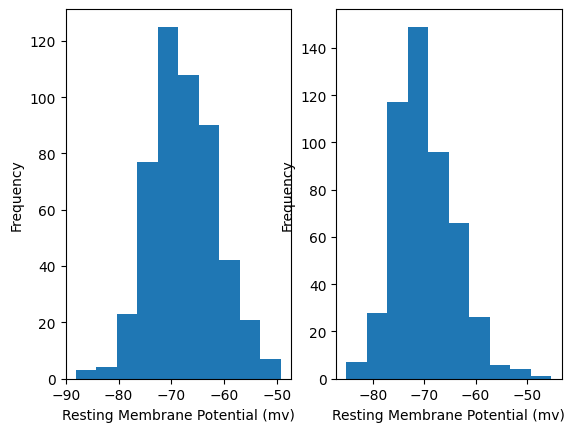

In [14]:
#finding means of lists
np.mean(v_rest_pvalb)
np.mean(v_rest_sst)

#comparing means of the two distributions to see if they're significantly different adn takign the p-value
criticalP = stats.ttest_ind(v_rest_pvalb,v_rest_sst)[1]

#plotting histogram if pvalue is significant
if (criticalP <.05): #the instructions said >.05 but I assumed this was a typo
  fig, ax = plt.subplots(1,2)
  ax[0].hist(v_rest_sst)
  ax[1].hist(v_rest_pvalb)
  ax[0].set_xlabel("Resting Membrane Potential (mv)")
  ax[0].set_ylabel("Frequency")
  ax[1].set_xlabel("Resting Membrane Potential (mv)")
  ax[1].set_ylabel("Frequency")

else:
  print("Your P value is not greater than .05")

In [16]:
#creating function to execute code of above

def vrestHist(list1,list2):
  '''
  This function will find the means of 2 given lists,
  perform a t-test on them, and plot a lbaeled histogram
  if the p-value of the t-test is less than .05
  '''

  #finding means of lists
  np.mean(list1)
  np.mean(list2)

  #comparing means of the two distributions to see if they're significantly different adn takign the p-value
  criticalP = stats.ttest_ind(list1,list2)[1]

  #plotting histogram if pvalue is significant
  if (criticalP <.05): #the instructions said >.05 but I assumed this was a typo
    fig, ax = plt.subplots(1,2)
    ax[0].hist(list1)
    ax[1].hist(list2)
    ax[0].set_xlabel("Resting Membrane Potential (mv)")
    ax[0].set_ylabel("Frequency")
    ax[1].set_xlabel("Resting Membrane Potential (mv)")
    ax[1].set_ylabel("Frequency")

  else:
    print("Your P value is not greater than .05")



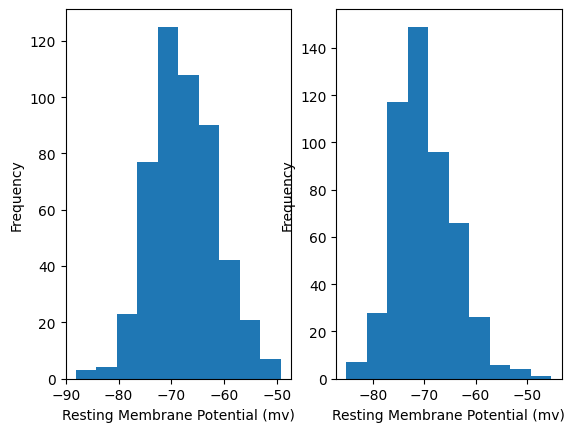

In [17]:
vrestHist(v_rest_sst, v_rest_pvalb)

Text(0, 0.5, 'Resting Membrane Potential values of Pvalb cells')

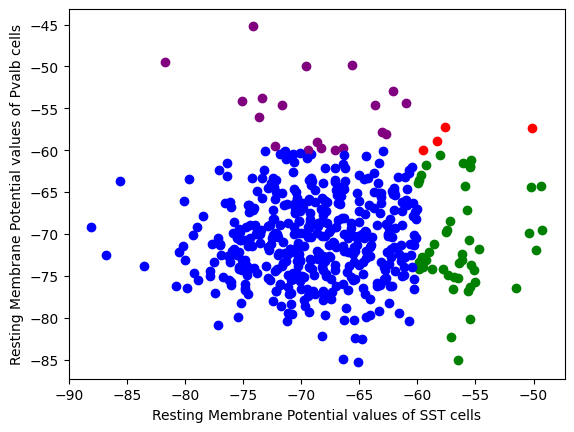

In [24]:
#loop through each column of the two lists and make a scatter plot

for i in range(len(v_rest_sst)):
  if(v_rest_sst[i] >-60) and (v_rest_pvalb[i] > -60):
    plt.scatter(v_rest_sst[i],v_rest_pvalb[i], color = "red")
  elif(v_rest_sst[i]>-60) and (v_rest_pvalb[i] <-60):
    plt.scatter(v_rest_sst[i],v_rest_pvalb[i], color = "green")
  elif(v_rest_sst[i]<-60) and (v_rest_pvalb[i]<-60):
    plt.scatter(v_rest_sst[i],v_rest_pvalb[i], color = "blue")
  elif(v_rest_sst[i]<-60) and (v_rest_pvalb[i]>-60):
    plt.scatter(v_rest_sst[i],v_rest_pvalb[i], color = "purple")
  else:
    print("Something went wrong with your conditions..")

plt.xlabel("Resting Membrane Potential values of SST cells(mV)")
plt.ylabel("Resting Membrane Potential values of Pvalb cells(mV)")




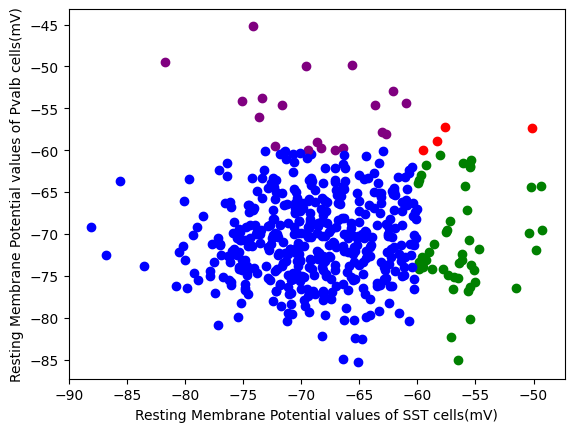

In [26]:
def vrestScatter(list1,list2):
  '''
  This function takes 2 sets of equal length data and plots them in a scatter plot.
  It takes somewhat artistic liberties on what colors to plot the datapoints.
  '''
  for i in range(len(list1)):
    if(list1[i] >-60) and (list2[i] > -60):
      plt.scatter(list1[i],list2[i], color = "red")
    elif(list1[i]>-60) and (list2[i] <-60):
      plt.scatter(list1[i],list2[i], color = "green")
    elif(list1[i]<-60) and (list2[i]<-60):
      plt.scatter(list1[i],list2[i], color = "blue")
    elif(list1[i]<-60) and (list2[i]>-60):
      plt.scatter(list1[i],list2[i], color = "purple")
    else:
      print("Something went wrong with your conditions..")

  plt.xlabel("Resting Membrane Potential values of SST cells(mV)")
  plt.ylabel("Resting Membrane Potential values of Pvalb cells(mV)")

vrestScatter(v_rest_sst, v_rest_pvalb)

